In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #adv vizia

In [2]:
data ='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-11-22 15:22:33--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.36’

data.csv.36         100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-11-22 15:22:33 (114 MB/s) - ‘data.csv.36’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# STRING NORMALIZATION FOR FIELDS/HEADERS

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
# conver to pyth list 
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

# STRING NORMALIZATION FOR CONTENTS

In [10]:
# we can do the following now usinng our iteravble list strings, ie lower case it all
for col in strings:
    df[col]= df[col].str.lower().str.replace(' ','_')

In [11]:
# now look at how clean it looks in terms of values and fields!
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### where 1e6 is 1million so maybe there is 1car that cost a million 2million etc, most of it concentrated in the beginning, this is called long tail distro because most of the data is in here at the beginning (but also not true based on something I know from school)

<Axes: xlabel='msrp', ylabel='Count'>

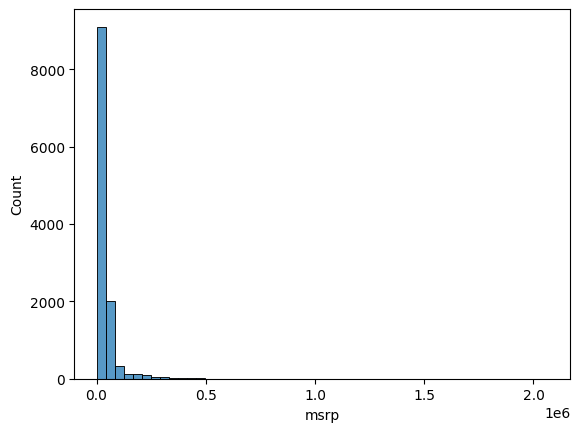

In [12]:
sns.histplot(df.msrp,bins =50) 

<Axes: xlabel='msrp', ylabel='Count'>

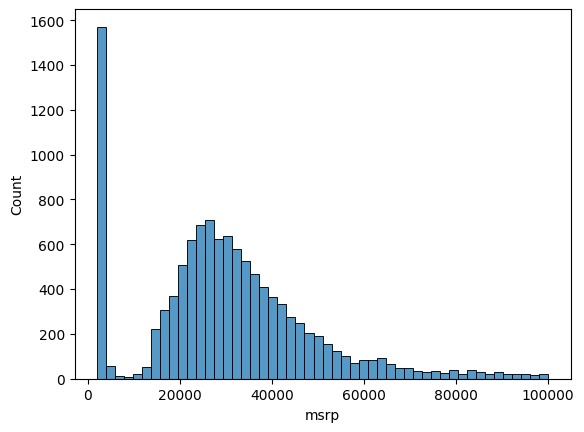

In [13]:
sns.histplot(df.msrp[df.msrp<1e5], bins=50) 
#this one is easier to look at as we got rid of taIL

### this kind of distribution is not good for mahcine learning, so we want to get rid of long tail.So we apply log to get compact values

In [14]:
price_logs = np.log1p(df.msrp)

### as you can see the tails are gone and this looks more/resembles a normal distro

<Axes: xlabel='msrp', ylabel='Count'>

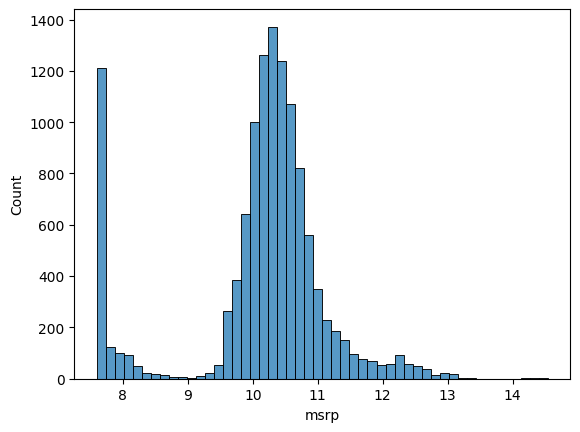

In [15]:
sns.histplot(price_logs,bins =50) 

### test and validation of 0.2 of total, take into to have whole numbers of records

In [16]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n-n_val-n_test)

### seq of numbers from 1 to n

In [17]:
idx = np.arange(n)

### and now our idx itself has been shuffled. also random seed so we can reproducable

In [18]:
np.random.seed(2)
np.random.shuffle(idx)

You will notice in his videos he has made bad typo (which he has addressed), this is why our df dont match perfect
The typo is that he took n_train as the starting point of the first slice, whereas the starting point is zero and in this case not explicitly set becuase of ":" convention 
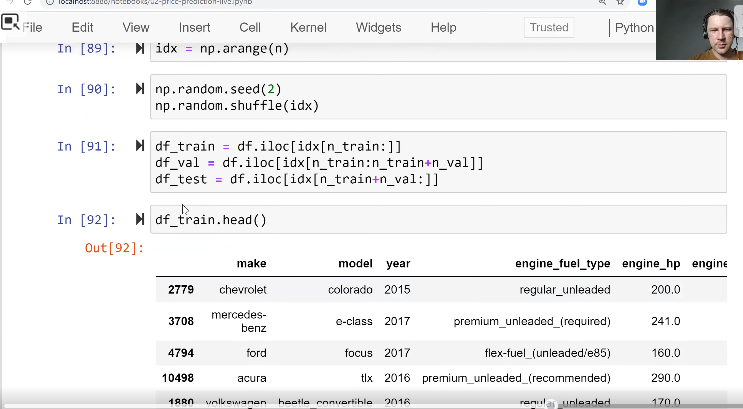

### we take the dataframes and put a list inside of the different idx slices we want, now we assigned the shuffle to the orig

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

### we go ahead and reset the index to make the table easier to manage by index if need be. notice this belongs to the object (random side quest of understanding dot notation versus method calls)

In [20]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [21]:
# we neeed to do log transformation with our y
y_train = np.log1p(df_train.msrp.values) #taking the numpy arr directly
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [22]:
# we neeed delete this from our table as we may accidentally let the table "see" it
# in past often target variable ended up in df and the model was amazingly perfect.
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [23]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [24]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5))

In [25]:
# the way we find is using isnoll sam
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [26]:
# easiest copout is fillem with zeros
df_train[base].fillna(0)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [27]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [28]:
df_train.columns #see it is gone now

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [29]:
categorical_variables = [
'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'
]

In [30]:
categories = {} # here we define an empty dictionary

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index) # replicating what we did before with make, getting top values that is 

In [31]:
def prepare_X(df):
    base = list(df.select_dtypes(include=['number']).columns.values)
    df = df.copy() #we copy then modify...
    features = base.copy() #this is the replacement of plus notation with safe copy 
    
    df[ 'age' ] = 2017 - df.year
    
    # features = base + ['age'] #this operation is for adding a new column not for arithm. 
    #above I don't use append because that woould modify the base so what we do is create above a base.copy()
    
    features.append( 'age' ) #we update this command from using + appending to append attribute with copy for safety

    for v in [2,3,4]:
        df[ 'num_doors_%s' % v ] = ( df.number_of_doors == v ).astype( 'int' )
        features.append( 'num_doors_%s' % v )


    # replace prev componenet for more generalized
    for c, values in categories.items(): # we need to do this over key-value pairs here so items()
        for v in values:
            df[ '%s_%s' % ( c, v ) ] = ( df[ c ] == v ).astype( 'int' )
            features.append('%s_%s' % ( c, v ) )
            

    
    df_num = df[ features ] #step 1 select numerical kolous
    df_num = df_num.fillna( 0 ) #step 2 fill it will zeros
    X = df_num.values #step 3 extract numpee arreh
    return X

In [32]:
def train_linear_regression_reg(X, y, r = 0.001 ):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


In [33]:
for r in [0.0, 0.00001, 0.0001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    
    X_val = prepare_X(df_val)
    y_pred = w0+X_val.dot(w) # notice now we do this not for training but for validation data set here
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 2096609257536091.2 119.43301579817877
1e-05 -6.0366586410862195e-05 0.4565169988223821
0.0001 -4.12139195481348e-05 0.45651701761555247
0.1 -4.217645502248837e-05 0.4565212136962909
1 -4.206891434014998e-05 0.456582104136787
10 -4.1551168915570234e-05 0.457786497443514


In [34]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)


X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w) # notice now we do this not for training but for validation data set here
score = rmse(y_val, y_pred)
score 

np.float64(0.45651705220073857)

In [35]:
df_full_train = pd.concat([df_train, df_val], ignore_index = True ) #think unioon in sql. 
# ignore index is analogous to doing a separate reset_index(drop = True)

In [36]:
# now we prepare our df to get our feature matrix
X_full_train = prepare_X(df_full_train)

In [37]:
X_full_train

array([[2.008e+03, 1.480e+02, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.012e+03, 1.320e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.016e+03, 1.480e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [2.013e+03, 3.320e+02, 8.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.480e+02, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.015e+03, 2.900e+02, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], shape=(9532, 43))

In [38]:
# similar to pd we have np concat
y_full_train = np.concatenate([y_train, y_val]) # no index here that we need to reset drop true

In [39]:
# similar to pd we have np concat
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [40]:
w0

np.float64(-4.265871918133252e-05)

In [41]:
w

array([ 5.59047296e-03,  1.52502955e-03,  1.18184109e-01, -2.27058436e-01,
       -6.66270578e-03, -5.33483873e-03, -4.87604879e-05, -9.13195009e-02,
       -3.40002796e-01, -2.11196515e-01,  2.71634317e-01, -4.14317977e-02,
        1.75561942e-01, -5.81951213e-04, -1.00563230e-01, -9.27552553e-02,
       -4.66934325e-01,  7.97947664e-02, -3.16122497e-01, -5.52054929e-01,
       -7.90107696e-02, -1.68962950e-01, -3.44271042e-01, -1.14689377e-01,
        1.38839810e+00, -7.54260604e-01,  4.88773753e-02, -5.04215315e-02,
        3.67501923e-02, -3.52484374e-02, -9.70565586e-02,  3.73024206e-02,
       -5.81754048e-02, -2.35911245e-02, -1.19298722e-02,  8.13713649e-02,
       -3.29970521e-02, -4.84168424e-02, -5.00804022e-02,  5.62137239e-02,
        1.84794418e-01,  3.32644556e-01, -1.58808489e-01])

In [42]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w) # notice now we do this not for training but for validation data set here
score = rmse(y_test, y_pred)
score 

np.float64(0.451774665385543)

In [43]:
# not too diff from what we had previously, up to third decimal pt, it can generalize well.

### Also check out the component with X_small in lesson 2 to see a prediction of a specific car. For some reason it won't compile in this notebook. And I didn't care to try to hard to fix it.